# Heart Disease Predictor

Aishwarya Shivanand (300317462) - CSIS-4495-090
Minal Dhansukhlal (300318615)- CSIS-4495-090

### Data Cleaning

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Opening the file
unclean_df = pd.read_csv('heart.csv')

In [3]:
unclean_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Handling missing rows 

In [4]:
###
# Get Number of na values in columns
###
unclean_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No na values found in the columns

In [5]:
###
# Get Number of na values in rows
###
unclean_df.shape[0] - unclean_df.dropna().shape[0]

0

Cross-Verifying - no na values in rows 

In [6]:
###
# Get Number of na values in rows
###
unclean_df.shape[0] - unclean_df.dropna().shape[0]

0

In [7]:
#checking to see if there are any duplicate values in the dataset
unclean_df.duplicated().sum()

1

In [8]:
#dropping the one duplicate value found in the dataset
unclean_df = unclean_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [9]:
#rounding off the values of age to the nearest whole number
unclean_df['age'] = unclean_df['age'].apply(lambda x : round(x))

<ipython-input-9-357454cad505>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_df['age'] = unclean_df['age'].apply(lambda x : round(x))


In [10]:
unclean_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
#handling empty rows
unclean_df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
unclean_df

<ipython-input-12-40d46cdb1782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unclean_df.dropna(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
#Saving the cleaned dataset to a excel file 
unclean_df.to_csv('cleaned_data2.csv')

# Exploratory Data Analysis

In [16]:
#Some summary statistics of the dataset.
unclean_df.describe()
unclean_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    164
0    138
Name: target, dtype: int64


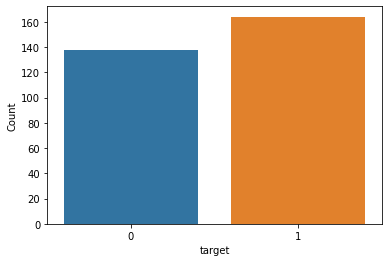

In [17]:
#Count plot of Heart Disease

print(unclean_df.target.value_counts())
ax = sns.countplot(data=unclean_df, x="target")
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'sex'),
  Text(2.5, 0, 'cp'),
  Text(3.5, 0, 'trestbps'),
  Text(4.5, 0, 'chol'),
  Text(5.5, 0, 'fbs'),
  Text(6.5, 0, 'restecg'),
  Text(7.5, 0, 'thalach'),
  Text(8.5, 0, 'exang'),
  Text(9.5, 0, 'oldpeak'),
  Text(10.5, 0, 'slope'),
  Text(11.5, 0, 'ca'),
  Text(12.5, 0, 'thal'),
  Text(13.5, 0, 'target')])

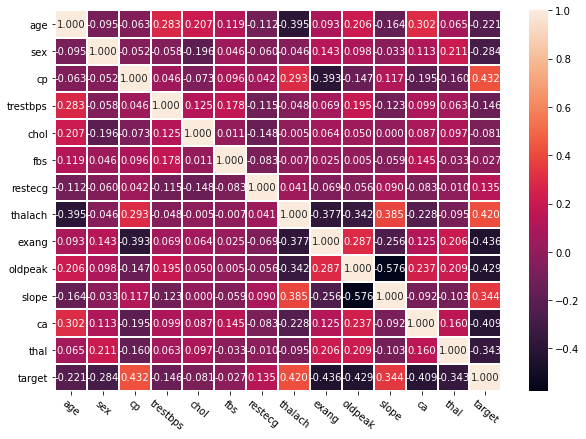

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(unclean_df.corr(), annot=True, fmt = '.3f', linewidths=1)
plt.xticks(rotation = 320)

# Feature Selection and Scaling

In [19]:
df = unclean_df

original_data = df
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# a. Feature Selection
We will use the following methods for feature selection
Method 1: Logistic Regression

Method 2: Linear SVM

Method 3: Select K-Best

Method 4: Variance Threshold

Method 5: Select From Model and Logistic Regression

Method 6: Generalized Linear Model (Binomial) from statsmodels

Method 7: Recursive Feature Elimination (RFE) and Logistic Regression

In [20]:
X = df.drop(columns=['target'])
y = df['target']

### Method 1: Logistic Regression

In [21]:
#including libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [22]:
feature_selection = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X, y)

In [23]:
feature_selection

SelectFromModel(estimator=LogisticRegression(max_iter=1000))

In [24]:
LogisticRegression_features = feature_selection.get_support(indices=True)

In [25]:
len(feature_selection.get_support(indices=True))

7

In [26]:
X_method1 = X.iloc[:,feature_selection.get_support(indices=True)]
X_method1

,sex,cp,exang,oldpeak,slope,ca,thal
0,1,3,0,2.3,0,0,1
1,1,2,0,3.5,0,0,2
2,0,1,0,1.4,2,0,2
3,1,1,0,0.8,2,0,2
4,0,0,1,0.6,2,0,2
...,...,...,...,...,...,...,...
298,0,0,1,0.2,1,0,3
299,1,3,0,1.2,1,0,3
300,1,0,0,3.4,1,2,3
301,1,0,1,1.2,1,1,3


### Method 2: Linear SVM

In [27]:
#include library LinearSVC
from sklearn.svm import LinearSVC

#LinearSVC where a regularization hyperparameter value 0.001, maximum iteration is 5000. Maximum iteration will give more accurate results
LinearSVC_selection = SelectFromModel(estimator=LinearSVC(C = 0.001 , max_iter=5000,dual=False)).fit(X, y)

In [28]:
LinearSVC_features = LinearSVC_selection.get_support(indices=True)

In [29]:
len(LinearSVC_features)

6

In [30]:
X_method2 = X.iloc[:,LinearSVC_selection.get_support(indices=True)]
X_method2

,sex,cp,exang,oldpeak,ca,thal
0,1,3,0,2.3,0,1
1,1,2,0,3.5,0,2
2,0,1,0,1.4,0,2
3,1,1,0,0.8,0,2
4,0,0,1,0.6,0,2
...,...,...,...,...,...,...
298,0,0,1,0.2,0,3
299,1,3,0,1.2,0,3
300,1,0,0,3.4,2,3
301,1,0,1,1.2,1,3


### Method 3: Select K-Best

In [31]:
#import libraries
from sklearn.feature_selection import SelectKBest ,mutual_info_classif

In [32]:
#SelectKBest with mutual_info_classif as the score metric 
SelectKBest_features = SelectKBest(mutual_info_classif,).fit(X, y)

In [33]:
SelectKBest_features.get_support(indices=True)

array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [34]:
X_method3 = X.iloc[:,SelectKBest_features.get_support(indices=True)]
X_method3

,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,233,0,150,0,2.3,0,0,1
1,1,2,250,1,187,0,3.5,0,0,2
2,0,1,204,0,172,0,1.4,2,0,2
3,1,1,236,1,178,0,0.8,2,0,2
4,0,0,354,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,1,123,1,0.2,1,0,3
299,1,3,264,1,132,0,1.2,1,0,3
300,1,0,193,1,141,0,3.4,1,2,3
301,1,0,131,1,115,1,1.2,1,1,3


gives 10 features because we selected k to be equal to 10

### Method 4: Variance Threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.25)
vt.fit(X)
#VarianceThreshold(threshold=0.15)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
variance,81.5947,0.216833,1.06159,307.451,2669.55,0.126804,0.275788,522.835,0.220352,1.3445,0.378536,1.01019,0.374556
select_feature,True,False,True,True,True,False,True,True,False,True,True,True,True


In [36]:
X_method4 = X.iloc[:,vt.get_support()]
X_method4

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63,3,145,233,0,150,2.3,0,0,1
1,37,2,130,250,1,187,3.5,0,0,2
2,41,1,130,204,0,172,1.4,2,0,2
3,56,1,120,236,1,178,0.8,2,0,2
4,57,0,120,354,1,163,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,1,123,0.2,1,0,3
299,45,3,110,264,1,132,1.2,1,0,3
300,68,0,144,193,1,141,3.4,1,2,3
301,57,0,130,131,1,115,1.2,1,1,3


### Method 5: Select From Model and Logistic Regression

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

method5 = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X, y)
method5.estimator_.coef_

array([[ 6.96366364e-04, -1.42360348e+00,  7.95979745e-01,
        -1.89706854e-02, -3.75938400e-03,  3.61922813e-02,
         3.94585163e-01,  2.34827766e-02, -8.35679543e-01,
        -5.25798710e-01,  4.97757758e-01, -7.79947625e-01,
        -8.37638796e-01]])

In [38]:
#cutoff abs(coefficient) value for feature significance
method5.threshold_

0.4749301778076885

In [39]:
#False = insignificant feature; True = significant fearture
method5.get_support()

array([False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True])

In [40]:
X_method5 = X.iloc[:,method5.get_support()]
X_method5

,sex,cp,exang,oldpeak,slope,ca,thal
0,1,3,0,2.3,0,0,1
1,1,2,0,3.5,0,0,2
2,0,1,0,1.4,2,0,2
3,1,1,0,0.8,2,0,2
4,0,0,1,0.6,2,0,2
...,...,...,...,...,...,...,...
298,0,0,1,0.2,1,0,3
299,1,3,0,1.2,1,0,3
300,1,0,0,3.4,1,2,3
301,1,0,1,1.2,1,1,3


### Method 6: Generalized Linear Model (Binomial) from statsmodels

In [41]:
import statsmodels.api as sm
logit_model = sm.GLM(y, X, family=sm.families.Binomial())
result=logit_model.fit(fit_intercept=True)
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            238.0239  
Link Function:      logit            BIC:            -1438.2896
Dependent Variable: target           Log-Likelihood: -106.01   
Date:               2021-06-19 21:37 LL-Null:        -208.21   
No. Observations:   302              Deviance:       212.02    
Df Model:           12               Pearson chi2:   281.      
Df Residuals:       289              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
age          0.0156    0.0193   0.8110  0.4173  -0.0222   0.0535
sex         -1.6352    0.4514  -3.6223  0.0003  -2.5201  -0.7504
cp           0.8357    0.1843   4.5353  0.0000   0.4745   1.1969
trestbps    -0.0163    0.0099  -1.6515  0.0986  -

We will select the features whose absolute coefficient value is greater than 0.01

In [42]:
result.params >= 0.01
X_method6 = X.loc[:, abs(result.params) >= 0.01]
X_method6


,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,1,0,150,0,2.3,0,0,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2
2,41,0,1,130,0,0,172,0,1.4,2,0,2
3,56,1,1,120,0,1,178,0,0.8,2,0,2
4,57,0,0,120,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3
299,45,1,3,110,0,1,132,0,1.2,1,0,3
300,68,1,0,144,1,1,141,0,3.4,1,2,3
301,57,1,0,130,0,1,115,1,1.2,1,1,3


gives us 12 columns

### Method 7: Recursive Feature Elimination (RFE) and Logistic Regression

chose to select 7 features using this method. chose 7 because 7 is half the number of initial columns

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=7, step=1)
rfe_result = rfe.fit(X, y)
print(rfe_result.support_)
print(rfe_result.ranking_)

X_method7 = X.loc[:, rfe_result.support_]
X_method7

[False  True  True False False False False False  True  True  True  True
  True]
[7 1 1 5 6 3 2 4 1 1 1 1 1]


,sex,cp,exang,oldpeak,slope,ca,thal
0,1,3,0,2.3,0,0,1
1,1,2,0,3.5,0,0,2
2,0,1,0,1.4,2,0,2
3,1,1,0,0.8,2,0,2
4,0,0,1,0.6,2,0,2
...,...,...,...,...,...,...,...
298,0,0,1,0.2,1,0,3
299,1,3,0,1.2,1,0,3
300,1,0,0,3.4,1,2,3
301,1,0,1,1.2,1,1,3


gives us the best 7 columns

### Selecting the best feature selection method

In [44]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

We will use the Logistic Regression Classifier to evaluate the accuracy of each method

#### i. Performance of Method 1: Logistic Regresssion

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_method1, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train1, y_train1)
y_pred_1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.824176


#### ii. Performance of Method 2: Linear SVM

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_method2, y, test_size=0.3, random_state=42)
logreg2 = LogisticRegression(max_iter=5000)
logreg2.fit(X_train2, y_train2)
y_pred_2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.813187


#### iii. Performance of Method 3: Select K-Best

In [47]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_method3, y, test_size=0.3, random_state=42)
logreg3 = LogisticRegression(max_iter=5000)
logreg3.fit(X_train3, y_train3)
y_pred_3 = logreg3.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg3.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.846154


#### iv. Performance of Method 4: Variance Threshold

In [48]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_method4, y, test_size=0.3, random_state=42)
logreg4 = LogisticRegression(max_iter=5000)
logreg4.fit(X_train4, y_train4)
y_pred_4 = logreg4.predict(X_test4)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg4.score(X_test4, y_test4)))

Accuracy of logistic regression classifier on test set: 0.791209


#### v. Performance of Method 5: Select From Model and Logistic Regression

In [49]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_method5, y, test_size=0.3, random_state=42)
logreg5 = LogisticRegression(max_iter=5000)
logreg5.fit(X_train5, y_train5)
y_pred_5 = logreg5.predict(X_test5)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg5.score(X_test5, y_test5)))

Accuracy of logistic regression classifier on test set: 0.824176


#### vi. Performance of Method 6: Generalized Linear Model (Binomial) from statsmodel

In [50]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_method6, y, test_size=0.3, random_state=42)
logreg6 = LogisticRegression(max_iter=5000)
logreg6.fit(X_train6, y_train6)
y_pred_6 = logreg6.predict(X_test6)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg6.score(X_test6, y_test6)))

Accuracy of logistic regression classifier on test set: 0.824176


#### vi. Performance of Method 7: RFE and Logistic Regression

In [51]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_method7, y, test_size=0.3, random_state=42)
logreg7 = LogisticRegression(max_iter=5000)
logreg7.fit(X_train7, y_train7)
y_pred_7 = logreg7.predict(X_test7)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg7.score(X_test7, y_test7)))

Accuracy of logistic regression classifier on test set: 0.824176


#### vii. Performance when using all features (13)

In [52]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y, test_size=0.3, random_state=42)
logreg8 = LogisticRegression(max_iter=5000)
logreg8.fit(X_train8, y_train8)
y_pred_8 = logreg8.predict(X_test8)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg8.score(X_test8, y_test8)))

Accuracy of logistic regression classifier on test set: 0.824176


There are 5 models with same accuracy and that accuracy is the highest(83.5165%). 
The differences in accuracy are minimal though
The best model is method 3: Select K-Best has an accuracy of 83.5165%. 
Choosing Select K-Best because the feature selected are highest in number. Having most features in the model makes it stronger 

In [53]:
# create a new variable to contain the selected X
new_features = X_method3

In [54]:
new_features

,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,233,0,150,0,2.3,0,0,1
1,1,2,250,1,187,0,3.5,0,0,2
2,0,1,204,0,172,0,1.4,2,0,2
3,1,1,236,1,178,0,0.8,2,0,2
4,0,0,354,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,1,123,1,0.2,1,0,3
299,1,3,264,1,132,0,1.2,1,0,3
300,1,0,193,1,141,0,3.4,1,2,3
301,1,0,131,1,115,1,1.2,1,1,3


# b. Feature Scalling

We will use Standard Scaler to scale the features

### Standard Scaler

In [55]:
# scale the features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

#this will scale the features to z-score but will lose the index and column
zscore = ss.fit_transform(new_features)

#create the df again
X_scaled = pd.DataFrame(zscore, index=new_features.index, columns=new_features.columns)
X_scaled = X_scaled.reset_index(drop=True)
X_scaled

,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.682656,1.976470,-0.261285,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,0.682656,1.005911,0.067741,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.464866,0.035352,-0.822564,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.682656,0.035352,-0.203222,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,-1.464866,-0.935208,2.080602,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...
297,-1.464866,-0.935208,-0.106449,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
298,0.682656,1.976470,0.338703,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
299,0.682656,-0.935208,-1.035462,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
300,0.682656,-0.935208,-2.235438,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


# Classification methods
<br>
For This Section 5 Models will be Tested : <br>
1. Support Vector Machines Classifier <br>
2. Random Forest Classifier <br>
3. Adaptive Boost Classifier <br>
4. KNeighborsClassifier<br>
5. Neural Network (Multi-layer Perceptron )<br>
6. Naïve Bayes classifier <br>
7. Decision tree classifier <br>
8. XGBOOST classifier<br>
For Each One a GridSearch Pipline is created to 
Investigate to use , also cross Validation is used 


In [56]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size = 0.25, random_state=0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train1.shape)
print("Number transactions y_train dataset: ", y_train1.shape)
print("Number transactions X_test dataset: ", X_test1.shape)
print("Number transactions y_test dataset: ", y_test1.shape)

Number transactions X_train dataset:  (226, 10)
Number transactions y_train dataset:  (226,)
Number transactions X_test dataset:  (76, 10)
Number transactions y_test dataset:  (76,)


In [57]:
X_train =X_train1
y_train = y_train1
X_test = X_test1
y_test = y_test1

In [58]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

### Support Vector Machine Classifier

In [59]:
SVC_Classifier = SVC(random_state=0,C =0.4 , kernel = 'linear' ).fit(X_train, y_train)
SVC_scores = cross_val_score(SVC_Classifier, X_train, y_train, cv=3)
SVC_scores_max = SVC_scores.max()
SVC_scores_max

0.8266666666666667

#### Prediction - testing data

In [60]:
SVC_Classifier_pred = SVC_Classifier.predict(X_test1)

#### Model Accuracy 

In [61]:
SVC_Classifier_acc = accuracy_score(y_test1,SVC_Classifier_pred)
SVC_Classifier_acc

0.8552631578947368

#### Confusion Matrix

In [62]:
SVC_Classifier_confusion_matrix = confusion_matrix(y_test1,SVC_Classifier_pred)
SVC_Classifier_confusion_matrix

array([[26,  7],
       [ 4, 39]], dtype=int64)

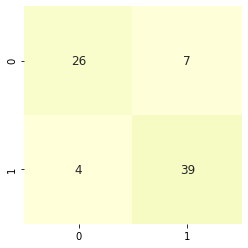

In [63]:
sns.heatmap(SVC_Classifier_confusion_matrix, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

####  Classification Report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, SVC_Classifier_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



### Random Forest Classifier

In [65]:
RandomForest_Classifier = RandomForestClassifier(random_state=0)
RandomForest_Classifier = RandomForest_Classifier.fit(X_train, y_train)
RF_scores = cross_val_score(RandomForest_Classifier, X_train, y_train, cv=3)
RF_scores_max = RF_scores.max()
RF_scores_max

0.8533333333333334

#### Prediction - testing data

In [66]:
RandomForest_Classifier_pred = RandomForest_Classifier.predict(X_test1)


#### Classification Report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, RandomForest_Classifier_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.85      0.93      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



#### Model Accuracy

In [68]:
RandomForest_Classifier_acc  = accuracy_score(y_test1,RandomForest_Classifier_pred)
RandomForest_Classifier_acc

0.868421052631579

#### Confusion Matrix

In [69]:
RandomForest_Classifier_matrix = confusion_matrix(y_test1,RandomForest_Classifier_pred)
RandomForest_Classifier_matrix

array([[26,  7],
       [ 3, 40]], dtype=int64)

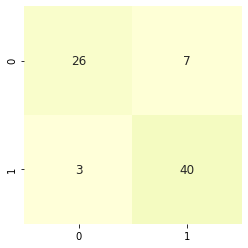

In [70]:
sns.heatmap(RandomForest_Classifier_matrix,  annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d",cmap="YlGnBu");

### Adaptive Boost Classifier

In [71]:
AdaBoost_Classifier = AdaBoostClassifier(random_state=0).fit(X_train1, y_train1)
ada_scores = cross_val_score(AdaBoost_Classifier, X_train, y_train, cv=3)
ada_scores_max= ada_scores.max()
ada_scores_max


0.8266666666666667

#### Prediction - testing data

In [72]:
AdaBoost_Classifier_pred = AdaBoost_Classifier.predict(X_test1)

#### Model Accuracy

In [73]:
AdaBoost_Classifier_acc  = accuracy_score(y_test1,AdaBoost_Classifier_pred)
AdaBoost_Classifier_acc

0.881578947368421

#### Confusion Matrix

In [74]:
AdaBoost_Classifier_matrix = confusion_matrix(y_test1,AdaBoost_Classifier_pred)
AdaBoost_Classifier_matrix

array([[28,  5],
       [ 4, 39]], dtype=int64)

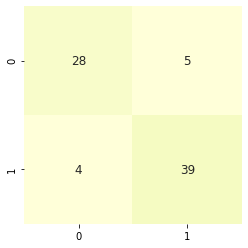

In [75]:
sns.heatmap(AdaBoost_Classifier_matrix, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Report

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, AdaBoost_Classifier_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



### KNeighborsClassifier 

In [77]:
KNeighbors_Classifier = KNeighborsClassifier().fit(X_train, y_train)
KN_scores = cross_val_score(KNeighbors_Classifier, X_train, y_train, cv=3)
KN_scores_max =KN_scores.max()
KN_scores_max

0.8266666666666667

#### Prediction - testing data

In [78]:
KNeighbors_Classifier_pred = KNeighbors_Classifier.predict(X_test1)

#### Model Accuracy 

In [79]:
KNeighbors_Classifier_acc  = accuracy_score(y_test1,KNeighbors_Classifier_pred)
KNeighbors_Classifier_acc

0.881578947368421

#### Confusion Matrix

In [80]:
KNeighbors_Classifier_matrix = confusion_matrix(y_test1,KNeighbors_Classifier_pred)
KNeighbors_Classifier_matrix

array([[28,  5],
       [ 4, 39]], dtype=int64)

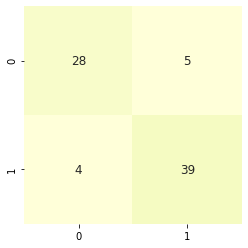

In [81]:
sns.heatmap(KNeighbors_Classifier_matrix, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Report 

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,KNeighbors_Classifier_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



### Neural Network (Multi-layer Perception )

In [83]:
MLP_Classifier = MLPClassifier(max_iter=800).fit(X_train, y_train)
MLP_scores = cross_val_score(MLP_Classifier, X_train, y_train, cv=3)
MLP_scores_max=MLP_scores.max()
MLP_scores_max

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8552631578947368

#### Prediction - test data

In [84]:
MLP_Classifier_pred = MLP_Classifier.predict(X_test1)

#### Model Accuracy 

In [85]:
MLP_Classifier_acc  = accuracy_score(y_test1,MLP_Classifier_pred)
MLP_Classifier_acc

0.8289473684210527

#### Confusion Matrix

In [86]:
MLP_Classifier_matrix = confusion_matrix(y_test1,MLP_Classifier_pred)
MLP_Classifier_matrix

array([[25,  8],
       [ 5, 38]], dtype=int64)

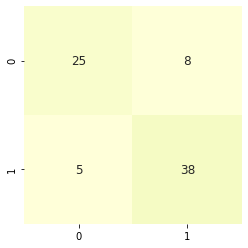

In [87]:
sns.heatmap(MLP_Classifier_matrix,  annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Matrix

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,MLP_Classifier_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### Naïve Bayes classifier

In [89]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold (n_splits=3,shuffle=True, random_state=0)
NB_estimator = GaussianNB()
NB = NB_estimator.fit(X_train,y_train)
cross_val_NB = cross_val_score(NB_estimator, X_train, y_train, cv=k_folds)
cross_val_NB_max = cross_val_NB.max()
cross_val_NB_max

0.8157894736842105

#### Prediction - test data

In [90]:
NB_Classifier_pred = NB.predict(X_test1)

#### Model Accuracy 

In [91]:
NB_Classifier_acc  = accuracy_score(y_test1,NB_Classifier_pred)
NB_Classifier_acc

0.8421052631578947

#### Confusion Matrix

In [92]:
NB_Classifier_matrix = confusion_matrix(y_test1,NB_Classifier_pred)
NB_Classifier_matrix

array([[26,  7],
       [ 5, 38]], dtype=int64)

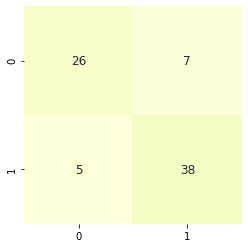

In [93]:
sns.heatmap(NB_Classifier_matrix,  annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Matrix

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,NB_Classifier_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.84      0.88      0.86        43

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



### Decision tree classifier

In [95]:
DTree_estimator = DecisionTreeClassifier(max_depth=5)
Dtree = DTree_estimator.fit(X_train,y_train)
cross_val_DTree = cross_val_score(DTree_estimator, X_train, y_train, cv=k_folds)
cross_val_DTree_MAX = cross_val_DTree.max()
cross_val_DTree_MAX

0.7866666666666666

#### Prediction - test data

In [96]:
DTree_Classifier_pred = Dtree.predict(X_test1)

#### Model Accuracy 

In [97]:
Dtree_Classifier_acc  = accuracy_score(y_test1,DTree_Classifier_pred)
Dtree_Classifier_acc

0.7894736842105263

#### Confusion Matrix

In [98]:
Dtree_Classifier_matrix = confusion_matrix(y_test1,DTree_Classifier_pred)
Dtree_Classifier_matrix

array([[24,  9],
       [ 7, 36]], dtype=int64)

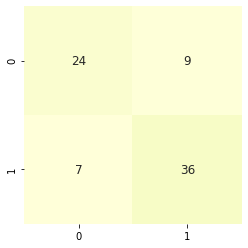

In [99]:
sns.heatmap(Dtree_Classifier_matrix,  annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Matrix

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,DTree_Classifier_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.80      0.84      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



###    XGBOOST CLASSIFIER

In [101]:
XGB_estimator = XGBClassifier()
XGB = XGB_estimator.fit(X_train,y_train)
cross_val_XGB = cross_val_score(XGB, X_train, y_train, cv=k_folds)
cross_val_XGB_MAX = cross_val_XGB.max()
cross_val_XGB_MAX

[21:38:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[21:38:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:38:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7866666666666666

#### Prediction - test data

In [102]:
XGB_Classifier_pred = XGB.predict(X_test1)

#### Model Accuracy 

In [103]:
XGB_Classifier_acc  = accuracy_score(y_test1,XGB_Classifier_pred)
XGB_Classifier_acc

0.8289473684210527

#### Confusion Matrix

In [104]:
XGB_Classifier_matrix = confusion_matrix(y_test1,XGB_Classifier_pred)
XGB_Classifier_matrix

array([[25,  8],
       [ 5, 38]], dtype=int64)

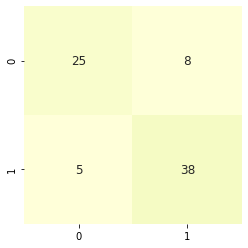

In [105]:
sns.heatmap(XGB_Classifier_matrix,  annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

#### Classification Matrix

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,XGB_Classifier_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### Results Analysis 

#### Cross Validation Results

In [107]:
cross_validation_results = [SVC_scores_max ,RF_scores_max 
                    ,ada_scores_max,KN_scores_max ,MLP_scores_max, cross_val_NB_max, cross_val_DTree_MAX, cross_val_XGB_MAX ]


results_names = [    
'SVM ',
'Random Forest ',
'Ada Boost ',
'KNeighbors',
'Neural Network',
'Naïve Bayes',
'Decision tree',
'XGBOOST'
]                   

In [108]:
CV_df = pd.DataFrame(cross_validation_results,index=results_names,columns = ['Cross Validation'])
CV_df

,Cross Validation
SVM,0.826667
Random Forest,0.853333
Ada Boost,0.826667
KNeighbors,0.826667
Neural Network,0.855263
Naïve Bayes,0.815789
Decision tree,0.786667
XGBOOST,0.786667


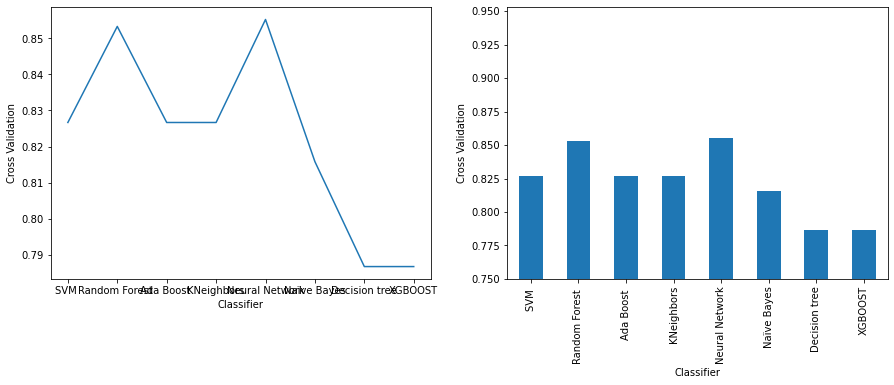

In [109]:
fig,ax=  plt.subplots(1,2,figsize=(15,5))
CV_df.plot(xlabel = 'Classifier' , ylabel = 'Cross Validation',legend=False, ax = ax[0]);
CV_df.plot(kind = 'bar',xlabel = 'Classifier' ,  ylabel = 'Cross Validation',legend=False, ax = ax[1]
            ,ylim=[0.75,0.953]);


#### Comment on cross validation 
1. Decision Tree has the lowest cross validation result of ~0.8000
2. Random Forest has the best cross validation result of ~0.8667

#### Accuracy Results

In [110]:
accuracy_results = [SVC_Classifier_acc ,RandomForest_Classifier_acc 
                    ,AdaBoost_Classifier_acc,KNeighbors_Classifier_acc ,MLP_Classifier_acc, NB_Classifier_acc, Dtree_Classifier_acc,
                   XGB_Classifier_acc]

In [111]:
Acc_df = pd.DataFrame(accuracy_results,index=results_names,columns = ['Accuracy'])
Acc_df

,Accuracy
SVM,0.855263
Random Forest,0.868421
Ada Boost,0.881579
KNeighbors,0.881579
Neural Network,0.828947
Naïve Bayes,0.842105
Decision tree,0.789474
XGBOOST,0.828947


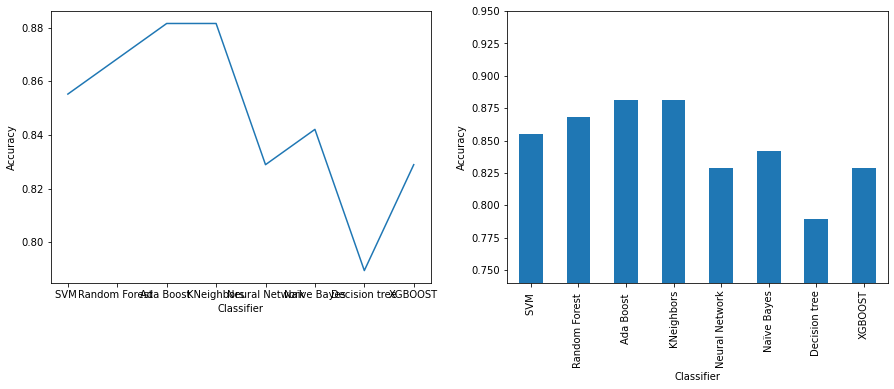

In [112]:
fig,ax=  plt.subplots(1,2,figsize=(15,5))
Acc_df.plot(xlabel = 'Classifier' , ylabel = 'Accuracy',legend=False, ax = ax[0]);
Acc_df.plot(kind = 'bar',xlabel = 'Classifier' , ylabel = 'Accuracy',legend=False, ax = ax[1]
            ,ylim=[0.74,0.950]);


#### Comment on accuracy
1. Neural Network Classifier  has the lowest accuracy result of ~0.7763
2. Ada Boost has the best accuracy result of ~0.8816

Accuracy is best in AdaBoost and CV score is best in Random Forest.However, Considering all other factors like number of false negative and false positive (9 in Ada boost - smallest among all other models), precision (around 0.88 for target 0 and 0.89 for target 1), recall(0.85 for target 0 and 0.91 for target 1), accuracy(0.88) we will select Ada Boost classifier model as the best model

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, AdaBoost_Classifier_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.89      0.91      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



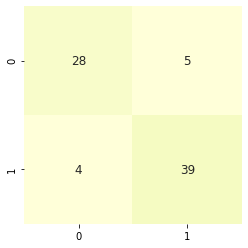

In [114]:
sns.heatmap(AdaBoost_Classifier_matrix, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="YlGnBu");

### ROC Curve

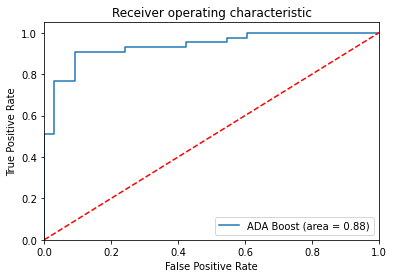

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, AdaBoost_Classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost_Classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ADA Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve plots the true positive rate vs the false positive rate.

According to [1], A good classifier stays as far away from that line as possible (toward the top-left corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In this case we do seem to have somewhat the best classifier since the area under the curve doesnt seems to be a lot further from 1.0. The area under the curve is 0.88.

# Prediction

In [116]:
pred_data = pd.read_csv('prediction.csv')
pred_data = pred_data.head(8)
pred_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56,1,1,120,240,0,1,169,0,0.0,0,0,2
1,55,0,1,132,342,0,1,166,0,1.2,2,0,2
2,41,1,1,120,157,0,1,182,0,0.0,2,0,2
3,38,1,2,138,175,0,1,173,0,0.0,2,4,2
4,67,1,0,160,286,0,0,108,1,1.5,1,3,2
5,67,1,0,120,229,0,0,129,1,2.6,1,2,3
6,62,0,0,140,268,0,0,160,0,3.6,0,2,2
7,63,1,0,130,254,0,0,147,0,1.4,1,1,3


In [117]:
pred_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [118]:
#checking to see if there are any duplicate values in the dataset
pred_data.duplicated().sum()

0

no null or duplicate variables

#### Feauture selection and scaling
Lets us match the features selected in the feature selection of Select K-best from statsmodel method.

In [119]:
df1 = pred_data[['sex','cp','chol','restecg','thalach', 'exang', 'oldpeak','slope','ca','thal']]
df1

,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,1,240,1,169,0,0.0,0,0,2
1,0,1,342,1,166,0,1.2,2,0,2
2,1,1,157,1,182,0,0.0,2,0,2
3,1,2,175,1,173,0,0.0,2,4,2
4,1,0,286,0,108,1,1.5,1,3,2
5,1,0,229,0,129,1,2.6,1,2,3
6,0,0,268,0,160,0,3.6,0,2,2
7,1,0,254,0,147,0,1.4,1,1,3


In [120]:
#transforming the test data using the robust scaler model you used in step 6
X_pred_scaled = ss.fit_transform(df1)
X_pred_scaled

array([[ 0.57735027,  0.53881591, -0.06985828,  1.        ,  0.6333112 ,
        -0.57735027, -1.04650805, -1.44115338, -1.06066017, -0.57735027],
       [-1.73205081,  0.53881591,  1.76899191,  1.        ,  0.50450214,
        -0.57735027, -0.07112191,  1.12089708, -1.06066017, -0.57735027],
       [ 0.57735027,  0.53881591, -1.56617755,  1.        ,  1.19148378,
        -0.57735027, -1.04650805,  1.12089708, -1.06066017, -0.57735027],
       [ 0.57735027,  1.97565832, -1.24167457,  1.        ,  0.80505661,
        -0.57735027, -1.04650805,  1.12089708,  1.76776695, -0.57735027],
       [ 0.57735027, -0.89802651,  0.7594271 , -1.        , -1.9858063 ,
         1.73205081,  0.17272463, -0.16012815,  1.06066017, -0.57735027],
       [ 0.57735027, -0.89802651, -0.26816565, -1.        , -1.0841429 ,
         1.73205081,  1.0668286 , -0.16012815,  0.35355339,  1.73205081],
       [-1.73205081, -0.89802651,  0.43492412, -1.        ,  0.24688403,
        -0.57735027,  1.87965039, -1.44115338

In [122]:
#as we see the ADA classifier proved to be the best accuracy and precision score among other classifier in model selection.
prediction = AdaBoost_Classifier.predict(X_pred_scaled)

In [123]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)